# ARIMA
## Components of ARIAM
1. AR - AutoRegression(자기회귀 모델)
2. I - Integrated (통합)
3. MA - Moving Average(이동평균 모델)

### AR
AR은 변화하는 관심 변수, 즉 우리가 예측하려는 새로운 미래의 y값이 데이터 자체의 lag된 값 즉, 이전의 값으로 회귀한다는 것을 의미  
${\displaystyle y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}}$   
$\phi_{1}, \phi_{2}$와 같은 이전(lag된)값의 계수을 가지고 얼마나 많은 지연을 고려해야 되는지를 결정해야 한다.  

### MR
MR 성분은 회귀 오차가 실제로 오차 항들의 선형 조합임을 나타냄  
오차 항들의 이 선형 조합은 과거의 다양한 시간에 동시적으로 발생한 오차 항 값들의 조합  
지연된 관찰 값에 적용된 이동평균 모델에서 나온 관찰 값과 잔여 오차 사이의 의존성을 이용함  
그래서 Pandas의 이동평균을 plot으로 나타날 때 시계열에서 noise를 'smoothing'했다는 걸 기억한다.  
그러면 그건 실제 값들과 그런 평탄화된 이동평균 값의 차이가 될 것이다.  
이 오차를 이용하여 또 다른 단순화된 회귀모델을 구성할 수 있다.  
$\epsilon_t + \theta_1\epsilon_{t-1}+ \cdots+\theta_q\epsilon_{t-q}$  
$\epsilon$: 잔차항  
역시 MA를 구축하기 위해 이동평균모델에서 얼마나 많은 지연을 해야 할지를 결정해야 한다. 
이 MA에 대한 또 다른 차수를 선택할 수 있는데 이는 일반화된 버전이다.  
우리가 결정해야 할 매개변수는 q이다.

### Integrated
I는 값과 이전 값의 차이로 데이터 값이 대체되었음을 나타냄 $\rightarrow$ 차분
즉, 정상 상태를 얻어서 AR과 MA가 함께 작동하도록 하기 위해서 몇개의 차분을 가져야 하느냐는 것

## Non-seasonal ARIMA
비계절성 ARIMA 모델은 일반적으로 ARIMA(p,d,q)라고 표기한다. 
p, d, q는 음수가 아닌 정수  
p = AR 모델의 차수  
d = 데이터의 차분 횟수  
q = MR 모델의 차수

ARMA($p^\prime$, $q$)는 다음과 같이 정의된다.  
$\underbrace{X_t - \alpha_1X_{t-1}-\cdots-\alpha_{p^\prime}X_{t-p^\prime}}_{AR}=\underbrace{\epsilon_t+\theta_1\epsilon_{t-1}+\cdots+\theta_q\epsilon_{t-q}}_{MR}$  
$X_t=$시계열 데이터  
$t=$ 인덱스  
$\alpha=$ AR 모델의 매개변수  
좌변 = AR에서 우리가 원하는 차수 p를 선택해야 하고, 이전 지연 값을 기초로 한 실제 회귀 모델  
우변 = $\epsilon_t$는 오차항이고 $\theta$는 MA 모델의 매개변수들

위의 식을 수학적 표현을 이용해서 간단히 표기하면 다음과 같이 정의할 수 있다.  
${\displaystyle \underbrace{\left( 1-\sum_{i=1}^{p^{\prime}}\alpha_iL^i\right)X_t}_{AR} = \underbrace{\left( 1+\sum_{i=1}^q\theta_iL^i\right)\epsilon_t}_{MA}}$  
$L= $지연 연산자  

ARIMA($p^{\prime}$, $d$, $q$)는 다음과 같이 정의한다.  
${\displaystyle\left( 1-\sum_{i=1}^{p^{\prime}}\phi_iL^i\right)(1-L)^dX_t = \left( 1+\sum_{i=1}^q\theta_iL^i\right)\epsilon_t}$   
$I$의 구성요소는 $1-L$, 즉 지연 연산자의 d 제곱이 된다. $\rightarrow$ 차분을 나타내는 수학적 표현

즉, ARIMA 모델은 잔여오차를 기반으로 한 자기회귀 모델과 이동평균 모델와 이 두 모델을 stationary하게 만드는 차분이 합쳐진 모델이다.  
ARIMA 모델을 적용시키기 위해 해야할 일은 p(AR 모델의 차수), d(MA 모델의 차수), p(차분의 횟수)를 구해야 한다.

# Choosing ARIMA Orders
ARIMA 모델의 p,d,q를 구하는 가장 고전적인 방식은 ACF, PACF plot을 읽는 방법이다.  
맨 처음 지역, 즉 lag-1에서 자기상관 plot이 양의 자기상관을 나타내면 이는 지연과 관련하여 실제로 AR 항을 포함시키고 사용함을 암시한다.  
만일 첫 번째 지연에서 음의 자기상관을 나타내는 자기상관 plot이라면, MA항을 사용해야 한다.  
p는 모델의 AR에 포함된 관찰 값의 개수였고 d는 원 관찰값들이 차분된 횟수였으며 q는 이동평균의 window의 크기였다.(MA의 차수)  
![image](https://user-images.githubusercontent.com/70187490/152482727-8b1d468a-a927-4cce-a9ce-3e496e2148c9.png)

통상적으로 지연 k 뒤에 가파르게 하강한다. 이러한 가파르게 하강하는 지연을 세면서 AR의 차수인 k를 사용해야 한다라는 것을 알 수 있다.  
만약 점진적으로 감소한다면, MA 모델을 사용해야 한다.  
AR 모델은 부분 자기상관 함수로 가장 잘 식별이 가능하며, MA 모델은 자기상관 함수로 가장 잘 식별할 수 있다.  

<br>

하지만 일반적인 상황에선 ACF와 PACF를 읽는 것이 쉽지 않을 수 있다.  
그래서 다양한 p, d, q 값들의 조합에 대해서 GridSearch를 사용하는 것이 효과적이며 일반적이다.  
그러한 결과로 나온 AIC값을 평가 기준으로 해서 어떤 모델이 가장 성능이 비교한다.

<br>

pmdarima 라이브러리는 AIC를 평가 기준으로 사용해서 다양한 ARIMA 모델들의 성능을 비교한다.  
AIC 정보 기준을 사용한 이유는 간단한 모델에 비해 유의미한 개선사항이 없으면 매우 높은 차수의 모델에 벌점을 주기 때문  
그렇게 해서 훈련 데이터의 오버피팅을 방지하게 된다.  
AIC의 방정식은 다음과 같다.  
$\text{AIC}=2k-2\ln(\hat L)$  
$k$를 모델에서 예측된 매개변수의 개수라고 하고, $L$을 모델의 우도 함수의 최댓값이다.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load a non-stationary dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',
                 index_col='Month',
                 parse_dates=True)
df1.index.freq = 'MS'

# load a stationary dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',
                 index_col='Date',
                 parse_dates=True)
df2.index.freq = 'D'

In [2]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0, max_p=6, max_q=3, seasonal=False, trace=True) 
# start_p = 0: AR 성분이 없다는 뜻
# max_p (or q): 상한값을 설정
# seasonal: 데이터에 계절성이 있냐 없냐
# trace: auto_arima가 피팅하려고 하는 첫 몇 개의 ARIMA를 출력해줌
# auto_arima는 자동적으로 gridsearch 기능을 지원하며 AIC를 기준으로 early stop기능까지도 지원한다.

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.032 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.029 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.036 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.076 seconds


C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA: order=(1, 1, 2); AIC=2460.515, BIC=2480.000, Fit time=0.288 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2461.879, BIC=2485.262, Fit time=0.323 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.118 seconds
Total fit time: 0.934 seconds


C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [3]:
stepwise_fit.summary()
# summary를 호출함으로써 가장 성능이 좋은 모델에 대한 report를 출력한다.


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Thu, 10 Feb 2022   AIC                           2460.154
Time:                        11:17:26   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

In [4]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=0, start_q=0, max_p=4, max_q=4, 
                          seasonal=True, trace=True, m=12)
# m: 계절당 기간의 개수
## 분기 데이터라면 m이 4가 될것이며 월간 데이터라면 12가 될걸이며 연간 데이터면 1이다.(연간 데이터가 1이라면 seasonal data가 아니라는 말이다.)

C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 12); AIC=1415.278, BIC=1421.203, Fit time=0.019 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 0) seasonal_order=(1, 0, 0, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1299.259, BIC=1311.110, Fit time=0.259 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 12); AIC=1398.827, BIC=1407.716, Fit time=0.064 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1301.228, BIC=1316.042, Fit time=0.350 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 1, 12); AIC=1304.383, BIC=1313.271, Fit time=0.163 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1301.136, BIC=1315.950, Fit time=0.238 seconds


C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(1, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 2) seasonal_order=(1, 0, 2, 12); data is likel

Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1278.175, BIC=1295.952, Fit time=0.636 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=1371.827, BIC=1386.641, Fit time=0.128 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=1267.601, BIC=1288.341, Fit time=0.475 seconds


C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 3) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 3) seasonal_order=(0, 0, 1, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); data is likel

Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 1, 12); AIC=1269.486, BIC=1287.263, Fit time=0.658 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 3) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 12); AIC=1344.044, BIC=1361.821, Fit time=0.304 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 0, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 0, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 3.347 seconds


C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(0, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 2) seasonal_order=(1, 0, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\Jun\anaconda3\envs\tsa_course\lib\site-packages\pmdarima\arima\auto.py:870: ModelFitWarning: Unable to fit ARIMA for order=(3, 1, 2) seasonal_order=(0, 0, 1, 12); data is likel

In [5]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(0, 0, 1, 12)   Log Likelihood                -626.801
Date:                            Thu, 10 Feb 2022   AIC                           1267.601
Time:                                    11:17:29   BIC                           1288.341
Sample:                                         0   HQIC                          1276.029
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7024      0.168      4.169      0.000       0.372       1.033
ar.L1          1.4368      0.109     13.169      0.000       1.223       1.651
ar.L2         -0.7066      0.080     -8.815      0.000      -0.864      -0.549
ma.L1         -1.4832      0.174     -8.524      0.000      -1.824      -1.142
ma.L2          0.5033      0.175      2.877      0.004       0.160       0.846
ma.S.L12       0.7444      0.077      9.730      0.000       0.594       0.894
sigma2       345.6775     37.222      9.287      0.000     272.723     418.631
===================================================================================
Ljung-Box (Q):                      164.01   Jarque-Bera (JB):                10.84
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# ARMA
**AR(1)** model은 다음과 같은 공식을 따른다:  
&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

반면 **MR(1)** model은 다음과 같은 공식을 따른다:  
&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

$c$는 상수이며  
$\mu$는 $y_t$의 기댓값,  
$\phi_1$는 AR의 lag coefficient,  
$\theta_1$는 MA의 lag coefficient이며  
$\epsilon$은 white noise이다.  

<br>

**ARMA(1, 1)** model은 다음과 같은 공식을 따른다.  
&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

ARMA model은 stationary dataset에서 사용이 가능하다.  
trend가 있는 비정상 dataset의 경우 ARIMA모델을 적용하기 위해 차분을 실시해야 한다.

In [6]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf    # p와 q의 차원을 결정하는 고전적인 방법으로 plot
from pmdarima import auto_arima     # GridSearch로 p,d,q를 찾게 해줌

# Stationary dataset
df1 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',
                 index_col='Date',
                 parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

df2 = pd.read_csv('../Data/TradeInventories.csv',
                 index_col='Date',
                 parse_dates=True)
df2.index.freq='MS'

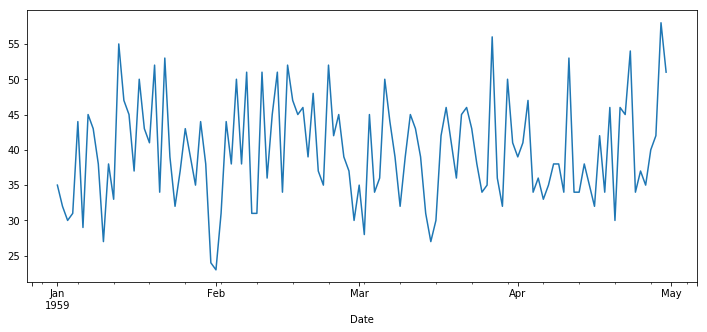

In [7]:
df1['Births'].plot(figsize=(12, 5));

어떤 명확한 추세나 명확한 계절성을 보이지 않는다 $\rightarrow$ stationary data  
단지 잡음이 많고 일일 출생이 40 정도에서 변동이 보이는 것으로 보인다.  

## Automate the augmented Dickey-Fuller Test
시계열 데이터가 정상정을 따르는지의 여부를 알기 위해 Dickey-Fuller Test를 실시한다.

In [8]:
from statsmodels.tsa.stattools import adfuller

def adf_test(Series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(Series.dropna(), autolag='AIC')
    
    labels = ['ADF test statistic', 'p-value', '# lags used', '# observations']
    out = pd.Series(result[0:4], index=labels)

    for key, val in result[4].items():
        out[f'critical value ({key})'] = val
        
    print(out.to_string(), '\n') 
        
    if result[1] <= 0.05:
        print('귀무가설에 반하는 증거가 확실합니다')
        print('귀무가설을 기각합니다.')
        print('이 데이터에선 단위근이 없으며 정상적입니다.')
    else:
        print('귀무가설을 기각할 증거가 불충분합니다.')
        print('귀무가설을 기각하지 못합니다.')
        print('이 데이터에선 단위근이 있으며 비정상적입니다.')

In [9]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00 

귀무가설에 반하는 증거가 확실합니다
귀무가설을 기각합니다.
이 데이터에선 단위근이 없으며 정상적입니다.


## Determine the (p, q) ARMA Orders using <tt>pmdarima.auto_arima</tt>

In [10]:
auto_arima(df1['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(0, 0)   Log Likelihood                -409.745
Method:                           css   S.D. of innovations              7.357
Date:                Thu, 10 Feb 2022   AIC                            823.489
Time:                        11:17:30   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.7833      0.672     59.240      0.000      38.467      41.100
==============================================================================
"""

## Split the data into train/test sets and fit an ARMA(p,q) model

In [11]:
train = df1.iloc[:90]
test = df1.iloc[90:]

model = ARMA(train['Births'], order=(2, 2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Thu, 10 Feb 2022   AIC                            627.809
Time:                        11:17:30   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

## Obtain a month's worth of predicted values

In [12]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start, end).rename('ARMA (2, 2) Predictions')
predictions

1959-04-01    39.982226
1959-04-02    39.992610
1959-04-03    39.809831
1959-04-04    39.848172
1959-04-05    39.761538
1959-04-06    39.794253
1959-04-07    39.750499
1959-04-08    39.772832
1959-04-09    39.749660
1959-04-10    39.763666
1959-04-11    39.750990
1959-04-12    39.759431
1959-04-13    39.752353
1959-04-14    39.757336
1959-04-15    39.753334
1959-04-16    39.756243
1959-04-17    39.753963
1959-04-18    39.755651
1959-04-19    39.754346
1959-04-20    39.755322
1959-04-21    39.754574
1959-04-22    39.755137
1959-04-23    39.754707
1959-04-24    39.755032
1959-04-25    39.754785
1959-04-26    39.754972
1959-04-27    39.754829
1959-04-28    39.754937
1959-04-29    39.754855
1959-04-30    39.754917
Freq: D, Name: ARMA (2, 2) Predictions, dtype: float64

## Plot predictions against known values

Error:  [0.05589996]


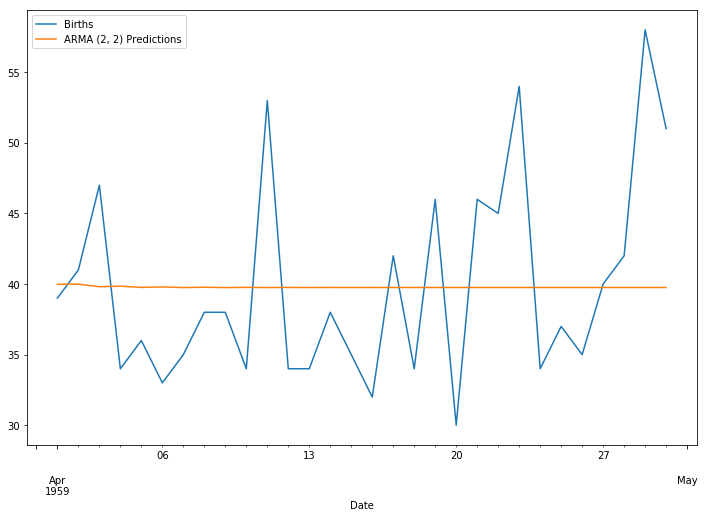

In [13]:
print('Error: ',test.mean().values-predictions.mean())
test['Births'].plot(figsize=(12, 8), legend=True)
predictions.plot(legend=True);

# ARIMA

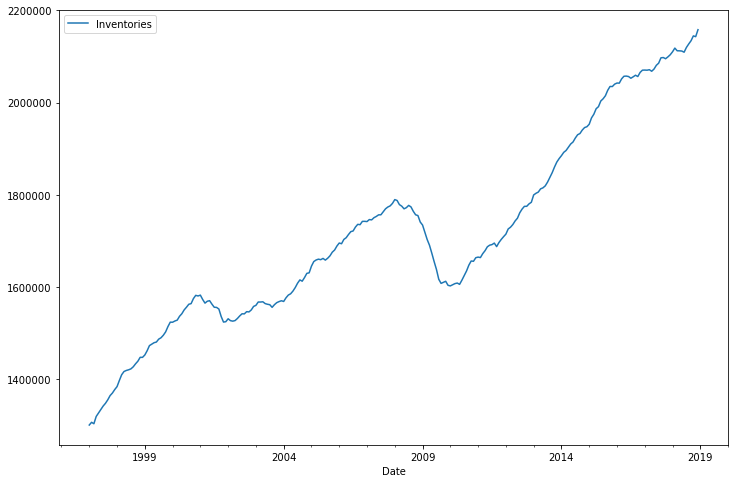

In [14]:
df2.plot(figsize=(12, 8));

## Run an ETS Decomposition (optional)

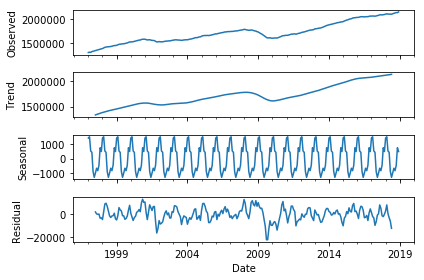

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Inventories'], model='add')
result.plot();

ETS 분해를 보면, seasonal 요소가 있지만 scale이 매우 다른 것을 볼수가 있다.  
이 데이터에선 seasonal 요소가 시계열에 크게 기여하지 않다는 것을 알 수 있다.  

## Use <tt>pmdarima.auto_arima</tt> to determine ARIMA Orders

In [16]:
auto_arima(df2['Inventories'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.257
Date:                Thu, 10 Feb 2022   AIC                           5228.505
Time:                        11:17:31   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3483.5062   1314.300      2.650      0.009     907.526    6059.487
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.546      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

## Run the augmented Dickey-Fuller Test on the First Difference
1번 차분한 데이터가 stationary한지를 알아 내고자 augmented Dickey-Fuller Test를 진행한다.

In [17]:
from statsmodels.tsa.statespace.tools import diff

df2['Diff_1'] = diff(df2['Inventories'], k_diff=1)
adf_test(df2['Diff_1'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775 

귀무가설에 반하는 증거가 확실합니다
귀무가설을 기각합니다.
이 데이터에선 단위근이 없으며 정상적입니다.


고전적인 방식에서 알맞은 d 차수를 도출하기 위해서는 Dickey-Fuller Test를 여러번 반복하여 알맞은 d를 찾을 수 있다.  
하지만 p, q를 파악하기 위해서는 acf plot과 pacf plot을 그려서 찾아내야 하지만 이는 매우 어려운 일이다.  
다행히도 다음 예의 pacf plot에서 lag0 다음 lag1에서 sharpely cut-off가 발견되었다.  
이는 AR차수가 1이라는 것을 알수 있다.

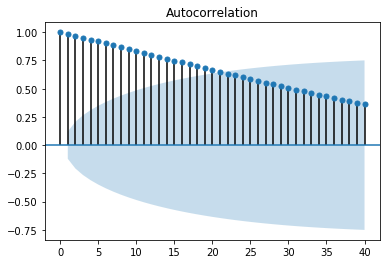

In [18]:
plot_acf(df2['Inventories'], lags=40);

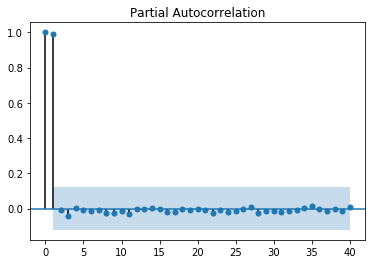

In [19]:
plot_pacf(df2['Inventories'], lags=40);

위의 PACF, ACF plot은 AR 항이 MA항보다 더 중요시 됨을 알려준다.
<br>
> <em>만약 PACF가 급격한 감소을 보여주는 동시에 ACF의 감소가 느리게 진행된다면, autocorrelation 패턴이 MA 항을 추가하는 것보다 AR 항을 추가함으로써 더 쉽게 설명이 가능하다는 의미로 해석할 수 있다.</em><br>

pmdarima.auto_arima를 통해 $p$와 $q$항이 동일한지를 확인해보자

In [20]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0, 
                          max_p=2, max_q=2, seasonal=False, trace=True)

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.003 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.036 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.030 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.841, Fit time=0.070 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.529, BIC=5247.390, Fit time=0.092 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.089 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.165 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.501 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.257
Date:                Thu, 10 Feb 2022   AIC                           5228.505
Time:                        11:17:32   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3483.5062   1314.300      2.650      0.009     907.526    6059.487
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.546      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

위의 결과를 통해 우리는 ARIMA(1, 1, 1)이 가장 최적의 모델임을 확인하였으며 이를 이용하여 미래의 예상 관측값을 예측, 평가해보자
## Split the data into train/test sets

In [21]:
print(len(df2))

train = df2.iloc[:252]
test = df2.iloc[252:]

264


## Fit an ARIMA(1, 1, 1) Model

In [22]:
model = ARIMA(train['Inventories'], order=(1, 1, 1))
results= model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Thu, 10 Feb 2022   AIC                           4980.790
Time:                        11:17:32   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.873      2.378      0.018     561.666    5833.473
ar.L1.D.Inventories     0.9026      0.039     23.011      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [23]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start=start, end=end, typ='levels').rename('ARIMA(1, 1, 1) Predictions')
predictions

2018-01-01    2.107148e+06
2018-02-01    2.110526e+06
2018-03-01    2.113886e+06
2018-04-01    2.117231e+06
2018-05-01    2.120561e+06
2018-06-01    2.123878e+06
2018-07-01    2.127184e+06
2018-08-01    2.130479e+06
2018-09-01    2.133764e+06
2018-10-01    2.137041e+06
2018-11-01    2.140311e+06
2018-12-01    2.143573e+06
Freq: MS, Name: ARIMA(1, 1, 1) Predictions, dtype: float64

typ 파라미터는 'levels'와 'linear'로 이루어져 있으며 'linear'가 기본값이다.  
'linear'는 차분된 내생변수 측면에서 선형 예측을 하기 때문에 매우 작은 값이 나올 것이다.  
'levels'는 원래의 내생변수 측면에서 예측을 한다.  
지금은 원래의 데이터 안에서 미래를 예측을 해야 하기 때문에 'levels'로 지정하여 예측을 실시한다.

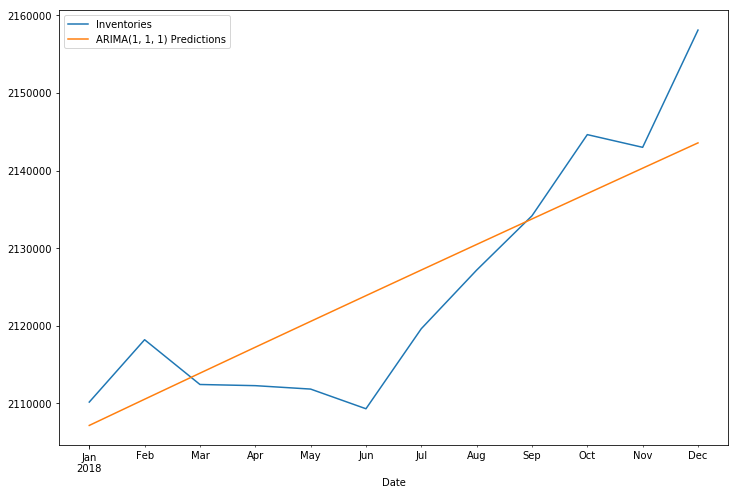

In [24]:
test['Inventories'].plot(legend=True, figsize=(12, 8))
predictions.plot(legend=True);

## Evaluate the Model

In [25]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'], predictions)
error

7789.596989413553

In [26]:
test['Inventories'].mean()

2125075.6666666665

In [27]:
predictions.mean()

2125465.2699704454

test의 평균은 21만을 보이는데 반해 rmse의 오차는 약 7천7백으로 도출되었다.  
이는 나쁜 오차는 아니다. 더불어 예측값의 평균과 실제 평균의 오차 또한 적어 괜찮은 예측값을 반환했다고 판단할 수 있다.  
우리가 아직 seasonal 요소를 반영하지 않았기 때문에 이는 더 줄일 수 있을 것이다.  

## Retrain the model on the full data, and forecast the future

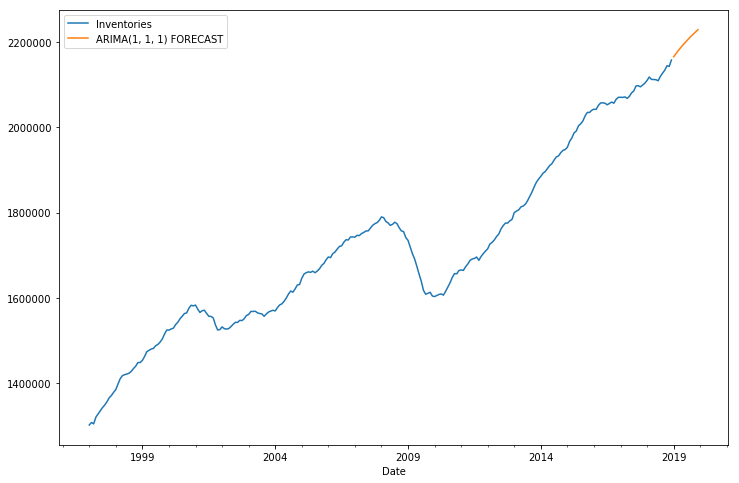

In [28]:
model = ARIMA(df2['Inventories'], order=(1, 1, 1))
results= model.fit()
fcast = results.predict(start = len(df2),
                      end = len(df2)+11,  # 예측하려는 값이 1년 이후이므로 +11
                      typ='levels').rename('ARIMA(1, 1, 1) FORECAST')
df2['Inventories'].plot(legend=True, figsize=(12, 8))
fcast.plot(legend=True);